# ASSIGNMENT 2
## Mayank Bajaj
## 210010039

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math as math

## Question 1

#### Taking V as the magnitude of velocity of the free stream

#### u= Vcos$\alpha$ and v= Vsin$\alpha$

#### we know, $\frac{\partial\phi}{\partial x}$= u

#### thus, $\phi$ = Vcos$\alpha$*x + g(y)

#### also $\frac{\partial\phi}{\partial y}$ = $\frac{\partial g}{\partial y}$ = v, so g=Vsin$\alpha$*y + c<sub>1</sub>

#### Therefore, the streamfunction or $\phi$ = Vcos$\alpha$*x + Vsin$\alpha$*y + c<sub>1</sub>

#### Similarly, $\frac{\partial\psi}{\partial y}$= u

#### thus, $\psi$ = Vcos$\alpha$*y + f(x)

#### also $\frac{\partial\psi}{\partial x}$ = $\frac{\partial f}{\partial x}$ = -v, so f=-Vsin$\alpha$*x + c<sub>2</sub>

#### Therefore, the velocity potential or $\psi$ = Vcos$\alpha$*y - Vsin$\alpha$*x + c<sub>2</sub>

#### Finally the complex potential = $\phi$ + *i*$\psi$ = Vcos$\alpha$*x + Vsin$\alpha$*y + c<sub>1</sub> + i*(Vcos$\alpha$*y - Vsin$\alpha$*x + c<sub>2</sub>)

In [2]:
def plot_free_stream(V,alpha):
    u=V*np.cos(math.radians(alpha))
    v=V*np.sin(math.radians(alpha))
    x,y=np.mgrid[-1.5:1.5:15j, -1:1:10j]
    plt.quiver(x,y,u,v)
    plt.axis('equal')

In [3]:
def plot_streamlines(V,alpha):
    x,y=np.mgrid[-1.5:1.5:15j,-1:1:10j]
    psi=V*np.cos(math.radians(alpha))*y-V*np.sin(math.radians(alpha))*x
    plt.contour(x,y,psi,levels=20)

In [4]:
def plot_potential(V,alpha):
    x,y=np.mgrid[-1.5:1.5:15j,-1:1:10j]
    phi=V*np.cos(math.radians(alpha))*x+V*np.sin(math.radians(alpha))*y
    plt.contour(x,y,phi,levels=20)

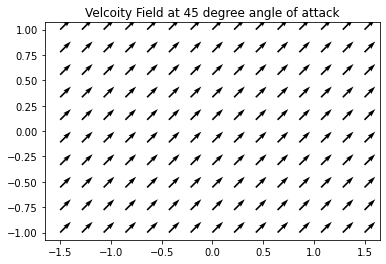

In [5]:
plot_free_stream(5,45)
plt.title('Velcoity Field at 45 degree angle of attack');

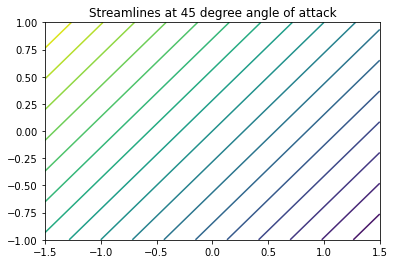

In [6]:
plot_streamlines(5,45)
plt.title('Streamlines at 45 degree angle of attack');

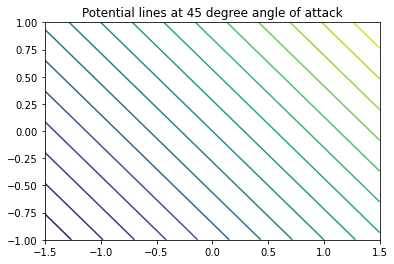

In [7]:
plot_potential(5,45)
plt.title('Potential lines at 45 degree angle of attack');

## Question 2

## Source/Sink

#### The radial component of velocity of a sink or a source($u_{r}$)= $\frac{q}{2 \pi r}$ and angular component($u_{\theta}$)= 0

#### And the potential function($\phi$)= $\frac{q *log(r)}{2 \pi }$

#### And the streamline function($\psi$)= $\frac{q *\theta}{2 \pi }$

#### source has a positive q(strength) while sink has a negative q(strength)

In [8]:
def source_sink(q,x,y,x0,y0):
    r=np.sqrt((x-x0)*(x-x0)+(y-y0)*(y-y0))
    u=q/(2*np.pi*r)
    ux=u*(x-x0)/r
    uy=u*(y-y0)/r
    ux[r<2]=0
    uy[r<2]=0
    plt.quiver(x,y,ux,uy)

In [9]:
def plot_streamlines_src_sink(q,x,y,x0,y0):
    r=np.sqrt((x-x0)*(x-x0)+(y-y0)*(y-y0))
    psi=np.arctan((y-y0)/(x-x0))*q/(2*np.pi)
    plt.contour(x,y,psi,levels=10)

In [10]:
 def plot_potential_src_sink(q,x,y,x0,y0):
        r=np.sqrt((x-x0)*(x-x0)+(y-y0)*(y-y0))
        phi=np.log(r)*q/(2*np.pi)
        plt.contour(x,y,phi,levels=20)

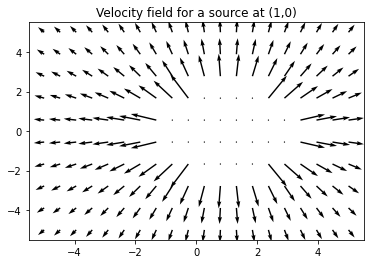

In [11]:
x,y=np.mgrid[-5:5:20j,-5:5:10j]
source_sink(1,x,y,1,0)
plt.title('Velocity field for a source at (1,0)');

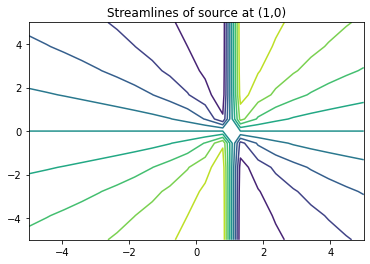

In [12]:
plot_streamlines_src_sink(1,x,y,1,0)
plt.title('Streamlines of source at (1,0)');

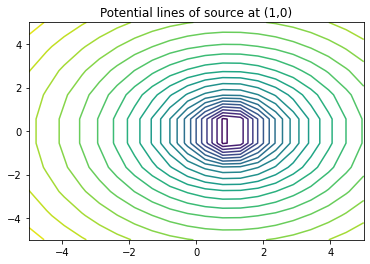

In [13]:
plot_potential_src_sink(1,x,y,1,0)
plt.title('Potential lines of source at (1,0)');

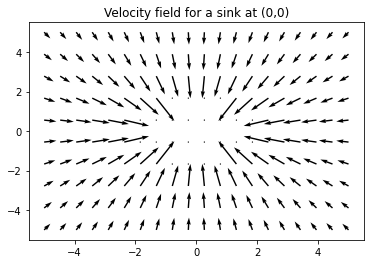

In [14]:
source_sink(-1,x,y,0,0)
plt.title('Velocity field for a sink at (0,0)');

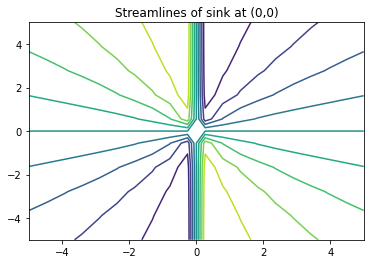

In [15]:
plot_streamlines_src_sink(-1,x,y,0,0)
plt.title('Streamlines of sink at (0,0)');

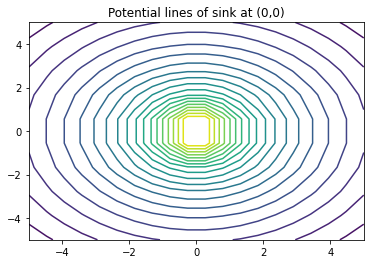

In [16]:
plot_potential_src_sink(-1,x,y,0,0)
plt.title('Potential lines of sink at (0,0)');

## Doublet

#### $\phi_{doublet} = \frac{\mu x}{2 \pi r^{2}}$

#### while $\psi_{doublet} = \frac{- \mu y}{2 \pi r^{2}}$

In [17]:
def doublet(mu,x,y):
    r=np.sqrt(x*x+y*y)
    ux=mu*(y*y-x*x)/(2*np.pi*(r**4))
    uy=-mu*x*y/(np.pi*(r**4))
    ux[r<1.8]=0
    uy[r<1.8]=0
    plt.quiver(x,y,ux,uy)

In [18]:
def plot_potential_doublet(mu,x,y):
    r=np.sqrt(x*x+y*y)
    phi=mu*x/(2*np.pi*r*r)
    plt.contour(x,y,phi,levels=20)

In [19]:
def plot_streamlines_doublet(mu,x,y):
    r=np.sqrt(x*x+y*y)
    psi=-mu*y/(2*np.pi*r*r)
    plt.contour(x,y,psi,levels=20)

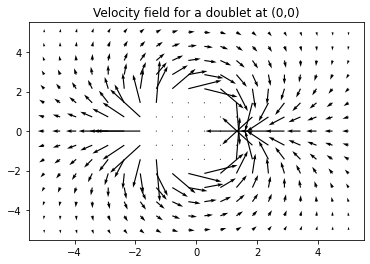

In [20]:
x,y=np.mgrid[-5:5:20j,-5:5:15j]
doublet(6,x,y)
plt.title('Velocity field for a doublet at (0,0)');

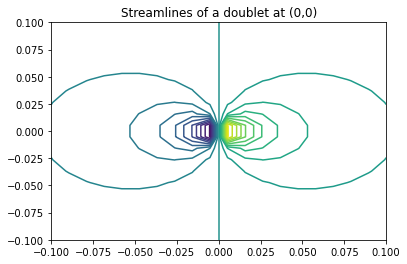

In [21]:
x,y=np.mgrid[-0.1:0.1:20j,-0.1:0.1:20j]
plot_potential_doublet(10,x,y)
plt.title('Streamlines of a doublet at (0,0)');

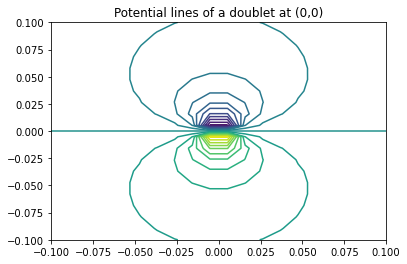

In [22]:
x,y=np.mgrid[-0.1:0.1:20j,-0.1:0.1:20j]
plot_streamlines_doublet(10,x,y)
plt.title('Potential lines of a doublet at (0,0)');

## Point Vertex

#### The radial component of velocity of a sink or a source($u_{r}$)= 0 and angular component($u_{\theta}$)= $\frac{\gamma}{2 \pi r}$

#### And the potential function($\phi$)= $\frac{\gamma *\theta}{2 \pi r }$

#### And the streamline function($\psi$)= $\frac{- \gamma *log(r)}{2 \pi }$


In [23]:
def point_vortex(gamma,x,y):
    r=np.sqrt(x*x+y*y)
    u_theta=gamma/(2*np.pi*r)
    ux=-u_theta*y/r
    uy=u_theta*x/r
    ux[r<2]=0
    uy[r<2]=0
    plt.quiver(x,y,ux,uy)

In [24]:
def plot_potential_vortex(gamma,x,y):
    r=np.sqrt(x*x+y*y)
    phi=gamma*np.arctan(y/x)/(2*np.pi)
    plt.contour(x,y,phi,levels=20)

In [25]:
def plot_streamline_vortex(gamma,x,y):
    r=np.sqrt(x*x+y*y)
    psi=-gamma*np.log(r)/(2*np.pi)
    plt.contour(x,y,psi,levels=20)

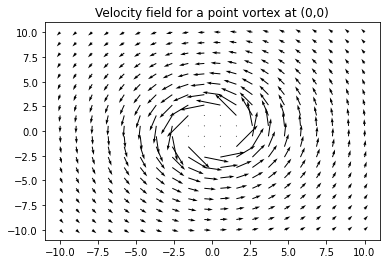

In [26]:
x,y=np.mgrid[-10:10:20j,-10:10:20j]
point_vortex(1,x,y)
plt.title('Velocity field for a point vortex at (0,0)');

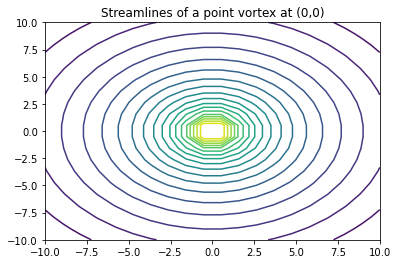

In [27]:
plot_streamline_vortex(1,x,y)
plt.title('Streamlines of a point vortex at (0,0)');

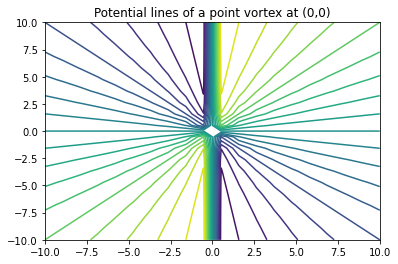

In [28]:
plot_potential_vortex(1,x,y)
plt.title('Potential lines of a point vortex at (0,0)');

## Question 3

In [29]:
def rankine_body_velocity(q,x,y,x0,y0,U):
    r=np.sqrt((x-x0)*(x-x0)+(y-y0)*(y-y0))
    u=q/(2*np.pi*r)
    ux=(u*(x-x0)/r)+U
    uy=u*(y-y0)/r
    ux[r<0.1]=0
    uy[r<0.1]=0
    plt.quiver(x,y,ux,uy)

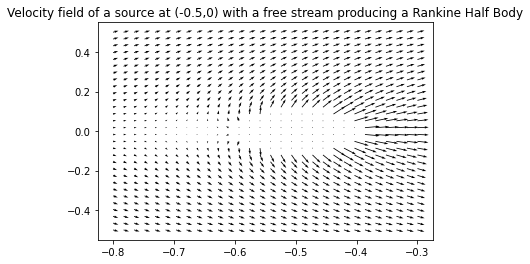

In [30]:
x,y=np.mgrid[-0.8:-0.3:30j,-0.5:0.5:30j]
x0=-0.5
y0=0
q=1
rankine_body_velocity(q,x,y,x0,y0,1)
plt.title('Velocity field of a source at (-0.5,0) with a free stream producing a Rankine Half Body');

In [31]:
def rankine_body_streamline(q,x,y,x0,y0,U):
    r=np.sqrt(x*x+y*y)
    psi=(np.arctan((y-y0)/(x-x0))*q/(2*np.pi))+U*y
    plt.contour(x,y,psi,levels=40)

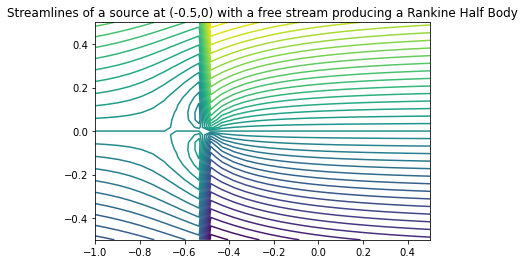

In [32]:
x,y=np.mgrid[-1:0.5:30j,-0.5:0.5:30j]
x0=-0.5
y0=0
q=1
rankine_body_streamline(q,x,y,x0,y0,1)
plt.title('Streamlines of a source at (-0.5,0) with a free stream producing a Rankine Half Body');

In [33]:
def rankine_body_potential(q,x,y,x0,y0,U):
    r=np.sqrt(x*x+y*y)
    phi=(np.log(r)*q/(2*np.pi))+U*x
    plt.contour(x,y,phi,levels=40)

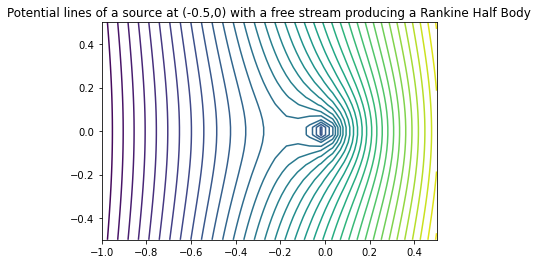

In [34]:
x,y=np.mgrid[-1:0.5:30j,-0.5:0.5:30j]
x0=-0.5
y0=0
q=1
rankine_body_potential(q,x,y,x0,y0,1)
plt.title('Potential lines of a source at (-0.5,0) with a free stream producing a Rankine Half Body');

In [35]:
def rankine_oval(q1,q2,x,y,x0,y0,x1,y1,U):
    r1=np.sqrt((x-x0)*(x-x0)+(y-y0)*(y-y0))
    r2=np.sqrt((x-x1)*(x-x1)+(y-y1)*(y-y1))
    u_src=q1/(2*np.pi*r1)
    u_sink=q2/(2*np.pi*r2)
    u_src[r1<0.05]=0
    u_sink[r2<0.05]=0
    ux=u_src*((x-x0)/r1)+u_sink*((x-x1)/r2)+U
    uy=u_src*((y-y0)/r1)+u_sink*((y-y1)/r2)
    return ux,uy

In [36]:
def rankine_oval_potential(q1,q2,x,y,x0,y0,x1,y1,U):
    r1=np.sqrt((x-x0)*(x-x0)+(y-y0)*(y-y0))
    r2=np.sqrt((x-x1)*(x-x1)+(y-y1)*(y-y1))
    phi=(np.log(r1)*q1/(2*np.pi))+(np.log(r2)*q2/(2*np.pi))+U*x
    return phi

In [37]:
def rankine_oval_streamline(q1,q2,x,y,x0,y0,x1,y1,U):
    r1=np.sqrt((x-x0)*(x-x0)+(y-y0)*(y-y0))
    r2=np.sqrt((x-x1)*(x-x1)+(y-y1)*(y-y1))
    psi=(np.arctan((y-y0)/(x-x0))*q1/(2*np.pi))+(np.arctan((y-y1)/(x-x1))*q2/(2*np.pi))+U*y
    return psi

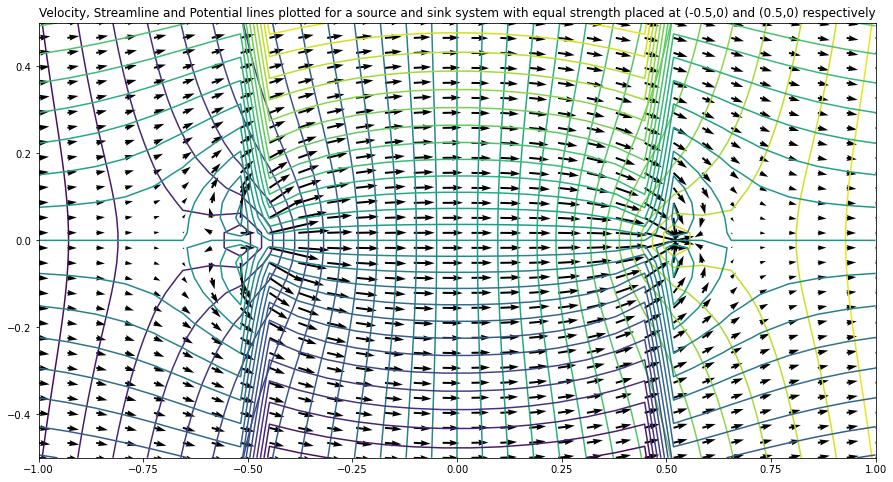

In [38]:
x,y=np.mgrid[-1:1:30j,-0.5:0.5:30j]
plt.rcParams['figure.figsize'] = [15,8]
ux,uy=rankine_oval(1,-1,x,y,-0.5,0,0.5,0,1)
plt.quiver(x,y,ux,uy)
phi=rankine_oval_potential(1,-1,x,y,-0.5,0,0.5,0,1)
plt.contour(x,y,phi,levels=30)
psi=rankine_oval_streamline(1,-1,x,y,-0.5,0,0.5,0,1)
plt.contour(x,y,psi,levels=30)
plt.title('Velocity, Streamline and Potential lines plotted for a source and sink system with equal strength placed at (-0.5,0) and (0.5,0) respectively');

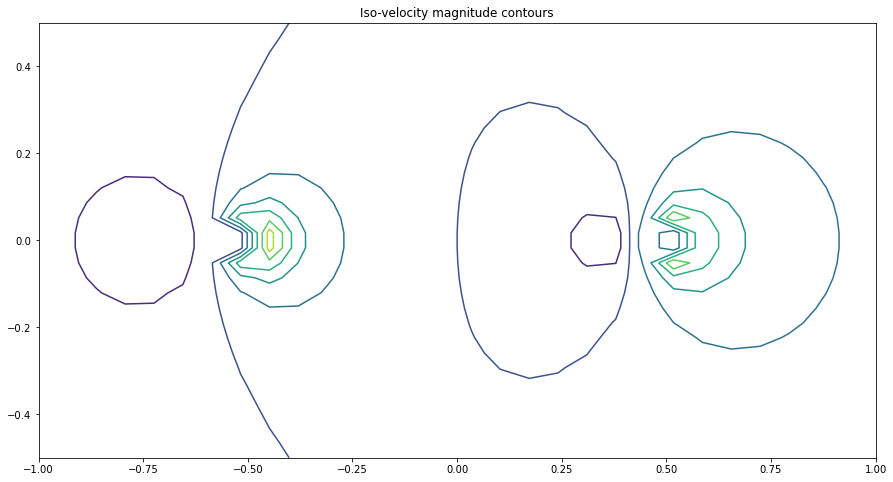

In [39]:
x,y=np.mgrid[-1:1:30j,-0.5:0.5:30j]
p0=100000
density=1000
U=1
ux,uy=rankine_oval(1,1,x,y,-0.5,0,0.5,0,1)
V=np.sqrt(ux**2+uy**2)
plt.contour(x,y,V)
plt.title('Iso-velocity magnitude contours');

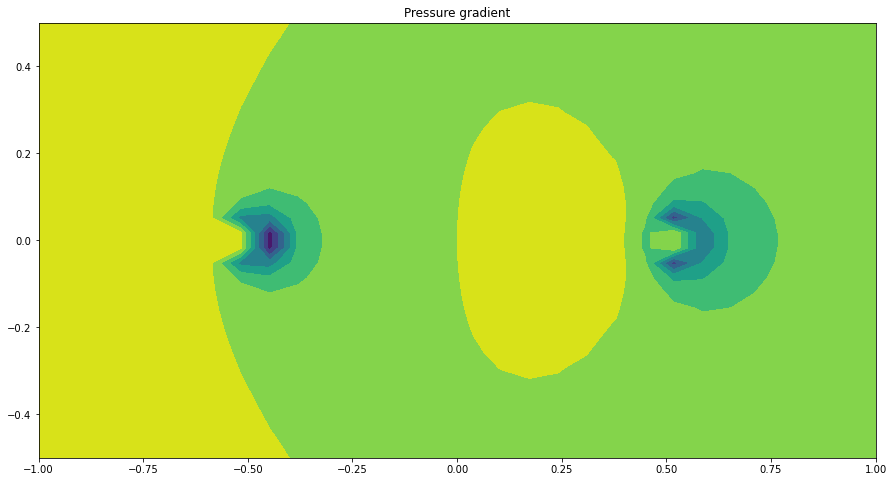

In [40]:
x,y=np.mgrid[-1:1:30j,-0.5:0.5:30j]
p0=100000
density=1000
U=1
ux,uy=rankine_oval(1,1,x,y,-0.5,0,0.5,0,1)
V=np.sqrt(ux**2+uy**2)
p=p0+0.5*density*(U*U-V*V)
plt.contourf(x,y,p)
plt.title('Pressure gradient');

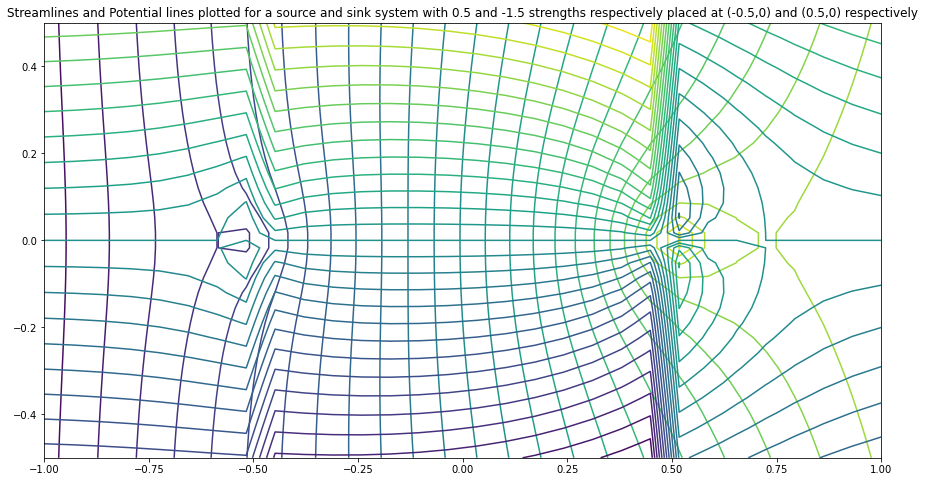

In [41]:
x,y=np.mgrid[-1:1:30j,-0.5:0.5:30j]
plt.rcParams['figure.figsize'] = [15,8]
#ux,uy=rankine_oval(0.5,-1.5,x,y,-0.5,0,0.5,0,1)
#plt.quiver(x,y,ux,uy)
phi=rankine_oval_potential(0.5,-1.5,x,y,-0.5,0,0.5,0,1)
plt.contour(x,y,phi,levels=30)
psi=rankine_oval_streamline(0.5,-1.5,x,y,-0.5,0,0.5,0,1)
plt.contour(x,y,psi,levels=30)
plt.title('Streamlines and Potential lines plotted for a source and sink system with 0.5 and -1.5 strengths respectively placed at (-0.5,0) and (0.5,0) respectively');

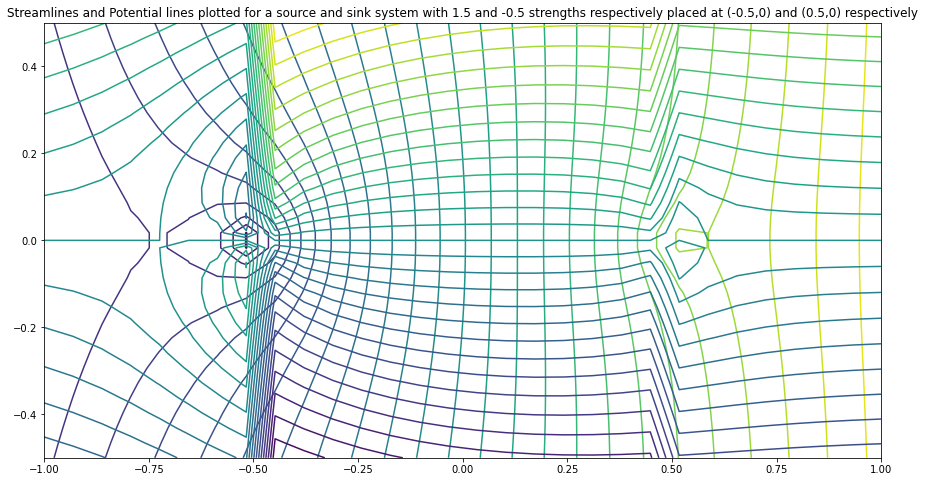

In [42]:
x,y=np.mgrid[-1:1:30j,-0.5:0.5:30j]
plt.rcParams['figure.figsize'] = [15,8]
#ux,uy=rankine_oval(1.5,-0.5,x,y,-0.5,0,0.5,0,1)
#plt.quiver(x,y,ux,uy)
phi=rankine_oval_potential(1.5,-0.5,x,y,-0.5,0,0.5,0,1)
plt.contour(x,y,phi,levels=30)
psi=rankine_oval_streamline(1.5,-0.5,x,y,-0.5,0,0.5,0,1)
plt.contour(x,y,psi,levels=30)
plt.title('Streamlines and Potential lines plotted for a source and sink system with 1.5 and -0.5 strengths respectively placed at (-0.5,0) and (0.5,0) respectively');